# Classificação - Base exame diabetes

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_train = pd.read_csv("data/diabete/Dados_Treino.csv")
df_test = pd.read_csv("data/diabete/Dados_Teste.csv")
df_template = pd.read_csv("data/diabete/Template_Submissao.csv")


In [67]:
# df_steam.dtypes

df_train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.0,0,0,0,0,0,0,0,0
3,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
4,182697,83,67.0,27.555611,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,1


In [68]:
df_test.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,231640,42,35.0,29.060607,0,Caucasian,F,169.0,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,220057,100,84.0,23.128938,0,Caucasian,F,170.2,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,238466,128,61.0,42.873376,0,Caucasian,M,175.2,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,214794,77,86.0,25.795461,0,Caucasian,F,162.6,NaN,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,255804,110,38.0,41.868512,1,African American,F,170.0,Operating Room,Operating Room / Recovery,...,202.0,202.0,202.0,0,0,0,0,0,0,0


In [69]:
df_template.head()

,encounter_id,diabetes_mellitus
0,231640,NaN
1,220057,NaN
2,238466,NaN
3,214794,NaN
4,255804,NaN


#### Remove as linhas que estão vazias -> NaN

In [70]:
df_template = df_template[(df_template['diabetes_mellitus'].notna()) & (df_template['diabetes_mellitus'] == True)]
df_template

# Todos os valores são Nan, o dataset fica vazio

,encounter_id,diabetes_mellitus


In [71]:
df_train_columns = df_train.columns
len(df_train_columns)

180

In [72]:
df_test_columns = df_test.columns
len(df_test_columns)

179

#### Unica coluna que tem no dataframe de treino e nao tem no dataframe de teste

In [73]:
df_train_columns.difference(df_test_columns)


Index(['diabetes_mellitus'], dtype='object')

In [74]:
df_train['diabetes_mellitus']

0         1
1         1
2         0
3         0
4         1
         ..
117136    0
117137    0
117138    1
117139    0
117140    0
Name: diabetes_mellitus, Length: 117141, dtype: int64

In [75]:
df_train_null = df_train.isnull().sum()
df_train_null.sort_values()

encounter_id              0
lymphoma                  0
leukemia                  0
immunosuppression         0
hepatic_failure           0
                      ...  
h1_lactate_max       106603
h1_albumin_max       107055
h1_albumin_min       107055
h1_bilirubin_max     107832
h1_bilirubin_min     107832
Length: 180, dtype: int64

In [76]:
list(df_train.columns)

['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp

In [77]:
# df_train['cirrhosis'].value_counts()

# df_cirrhosis = df_train.loc[df_train['diabetes_mellitus'] == 1, 'cirrhosis']
df_cirrhosis = df_train.loc[(df_train['diabetes_mellitus'] == 1) & (df_train['cirrhosis'] == 1)]

print(len(df_cirrhosis))
df_cirrhosis["cirrhosis"]


495


44        1
151       1
492       1
632       1
1405      1
         ..
115020    1
116304    1
116490    1
116594    1
116760    1
Name: cirrhosis, Length: 495, dtype: int64

In [78]:
# for i in df_train:
#     if type(i) != int or type(i) != float:
#         #  print(type(i))
#          print(i)

df_numeric = df_train.select_dtypes(include=['int', 'float'])
df_numeric
         

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,180.3,92,0.541667,0,73.9,...,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,160.0,90,0.927778,0,70.2,...,51.0,51.0,0,0,0,0,0,0,0,1
2,262220,118,81.0,22.635548,1,165.1,92,0.000694,0,61.7,...,337.0,337.0,0,0,0,0,0,0,0,0
3,201746,33,19.0,NaN,0,188.0,91,0.073611,0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
4,182697,83,67.0,27.555611,0,190.5,95,0.000694,0,100.0,...,NaN,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117136,164758,7,50.0,29.287256,0,175.3,1109,0.023611,0,90.0,...,NaN,NaN,0,0,0,0,0,0,0,0
117137,197653,7,79.0,29.653433,0,162.6,1106,0.009722,0,78.4,...,NaN,NaN,0,0,0,0,0,0,0,0
117138,219719,7,73.0,32.265371,0,177.8,1104,0.143056,0,102.0,...,163.0,163.0,0,0,0,0,0,0,0,1
117139,222562,170,81.0,24.408579,0,185.4,1108,0.188194,0,83.9,...,NaN,NaN,0,0,0,0,0,0,0,0


In [79]:

df_diabetes = df_train[df_train['diabetes_mellitus'] == 1]

df_filtered = df_diabetes[["age", "d1_calcium_min", "d1_calcium_max", "h1_calcium_min", "h1_calcium_max" ]]
print(df_filtered.count())
display(df_filtered)

age               24729
d1_calcium_min    22808
d1_calcium_max    22808
h1_calcium_min     5462
h1_calcium_max     5462
dtype: int64


,age,d1_calcium_min,d1_calcium_max,h1_calcium_min,h1_calcium_max
0,68.0,7.4,8.5,NaN,NaN
1,77.0,8.0,8.6,8.6,8.6
4,67.0,8.8,8.8,NaN,NaN
5,59.0,8.7,9.3,8.7,8.7
13,78.0,8.6,8.6,NaN,NaN
...,...,...,...,...,...
117121,78.0,8.1,8.3,NaN,NaN
117124,77.0,9.1,9.1,NaN,NaN
117126,59.0,8.9,8.9,NaN,NaN
117132,51.0,7.3,7.6,NaN,NaN


In [80]:
df_filtered = df_diabetes[["age", "d1_creatinine_min", "d1_creatinine_max", "h1_creatinine_min", "h1_creatinine_max" ]]
print(df_filtered.count())

display(df_filtered)

age                  24729
d1_creatinine_min    23350
d1_creatinine_max    23350
h1_creatinine_min     5678
h1_creatinine_max     5678
dtype: int64


,age,d1_creatinine_min,d1_creatinine_max,h1_creatinine_min,h1_creatinine_max
0,68.0,2.23,2.51,NaN,NaN
1,77.0,0.56,0.71,0.56,0.56
4,67.0,0.71,0.71,NaN,NaN
5,59.0,0.78,0.85,0.78,0.78
13,78.0,1.68,1.68,NaN,NaN
...,...,...,...,...,...
117121,78.0,1.20,1.63,NaN,NaN
117124,77.0,1.43,1.43,NaN,NaN
117126,59.0,1.43,1.43,NaN,NaN
117132,51.0,1.18,1.21,NaN,NaN


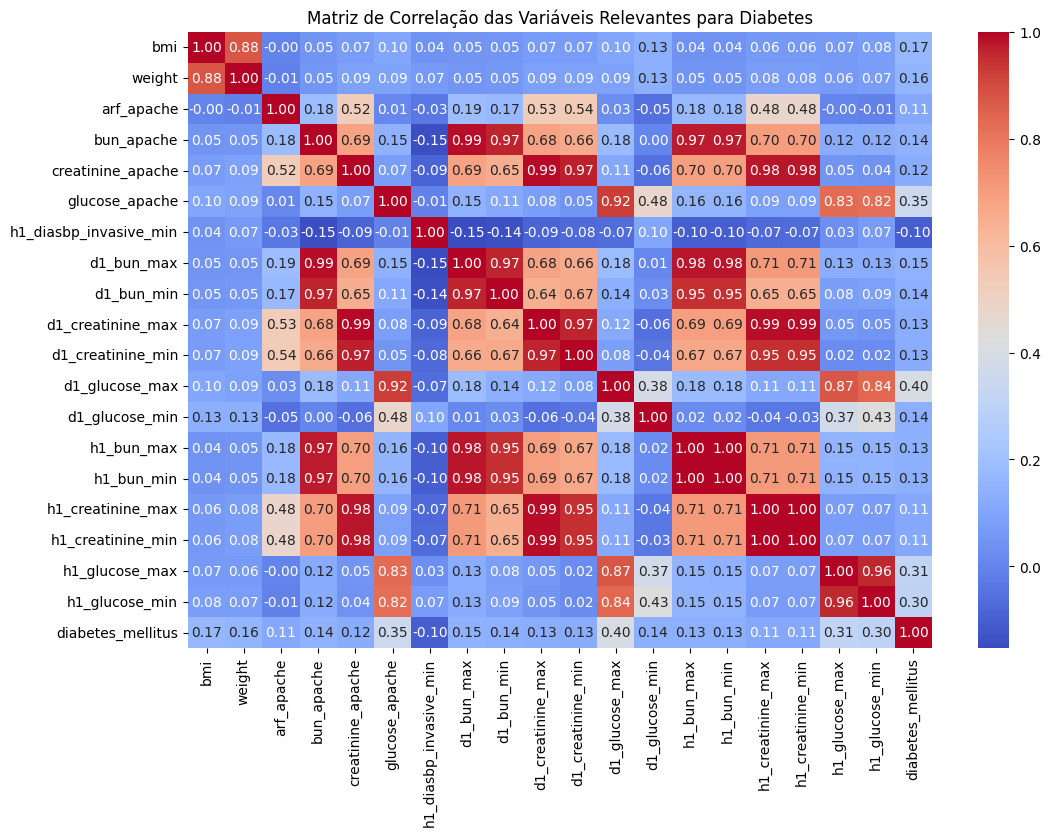

In [82]:


df_numeric = df_train.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# Selecionar apenas as colunas com correlação com 'diabetes_mellitus'
cor_target = corr_matrix["diabetes_mellitus"].abs()  # Usa o valor absoluto para ver a força da correlação
relevant_features = cor_target[cor_target > 0.1]  # Define um limite de correlação, por exemplo, > 0.1
relevant_columns = relevant_features.index

# Criar a matriz de correlação apenas para as colunas relevantes
filtered_corr_matrix = df_numeric[relevant_columns].corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Relevantes para Diabetes")
plt.show()
